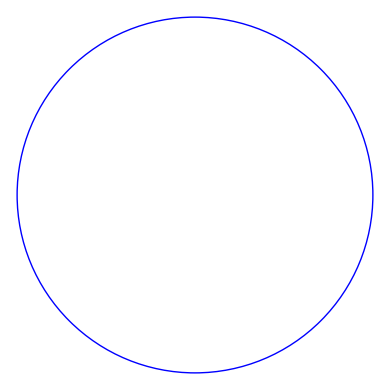

In [41]:
from PIL import Image

def get_points(picture_path):
    with Image.open(picture_path) as img:
        colors = img.getcolors(2)
        if (colors == None):
            raise Exception("Only monochrome images are supported")
        [(black_count, black), (white_count, white)] = colors
        if (white_count < black_count):
            black = white
        return [(x, y) for x in range(img.width) for y in range(img.height) if img.getpixel((x,y)) == black]

points = get_points("sample.png")
    
# We might want to use ProjectiveSpace
picture_plane = AffineSpace(QQ, len(points)*2,
                    [symbol
                     for symbol_pair in [['x_' + str(i), 'y_' + str(i)]
                                         for i in range(len(points))] for symbol in symbol_pair])
picture_point = picture_plane([c for p in points for c in p])
x = [picture_plane.gens()[2*i] for i in range(0, len(points))]
y = [picture_plane.gens()[2*i + 1] for i in range(0, len(points))]
# Moments sum(x_i^k), sum(y_i*x_i^k) should suffice:
# the full set of power symmetric functions for x and a linear system for y 

moment_polynomials = [reduce(operator.add, [x[i]^k*y[i]^l for i in range(len(points))])
                   for l in range(len(points) + 1) for k in range(len(points) + 1)][1:]

moments_plane = AffineSpace(QQ, len(moment_polynomials), 'm')
m = moments_plane.gens()

delete_marks = picture_plane.Hom(moments_plane)(moment_polynomials)

# "There is a point with two equal coordinates"
plane.<X, Y> = AffineSpace(QQ, 2)
def select_point(i):
    return picture_plane.Hom(plane)([x[i], y[i]])

function_result.<value> = AffineSpace(QQ, 1)
point_function = plane.Hom(function_result)([X - Y])
symmetric_point_function = reduce(
    operator.mul, [(point_function*select_point(i)).defining_polynomials()[0] for i in range(len(points))])
symmetric_point_function

G = Graphics()
G += circle((0, 0), 10)
G.show(axes = False)